# COGS 189 Project
> David Aminifard<br>
> A15451805<br>
> [Data Source](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State)

In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.neighbors import KNeighborsClassifier

In [2]:
raw_data = loadarff('EEG Eye State.arff')
df = pd.DataFrame(raw_data[0])
df["eyeDetection"] = df["eyeDetection"].apply(lambda x: 1 if x == b'1' else 0)
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AF3,14980.0,4321.917777,2492.072174,1030.7700,4280.51,4294.36,4311.79,309231.00
F7,14980.0,4009.767694,45.941672,2830.7700,3990.77,4005.64,4023.08,7804.62
F3,14980.0,4264.022433,44.428052,1040.0000,4250.26,4262.56,4270.77,6880.51
FC5,14980.0,4164.946326,5216.404632,2453.3300,4108.21,4120.51,4132.31,642564.00
T7,14980.0,4341.741075,34.738821,2089.7400,4331.79,4338.97,4347.18,6474.36
P7,14980.0,4644.022379,2924.789537,2768.2100,4611.79,4617.95,4626.67,362564.00
O1,14980.0,4110.400160,4600.926543,2086.1500,4057.95,4070.26,4083.59,567179.00
O2,14980.0,4616.056904,29.292603,4567.1800,4604.62,4613.33,4624.10,7264.10
P8,14980.0,4218.826610,2136.408523,1357.9500,4190.77,4199.49,4209.23,265641.00
T8,14980.0,4231.316200,38.050903,1816.4100,4220.51,4229.23,4239.49,6674.36


> Duration: 117 seconds<br>

# Preprocessing

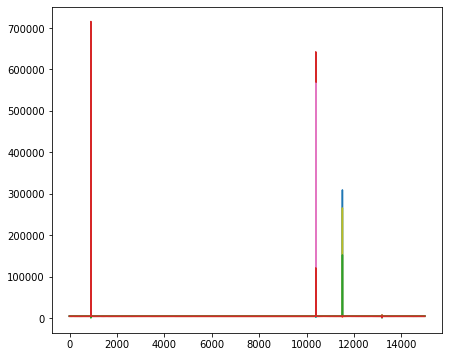

In [4]:
plt.figure(figsize=(7, 6))
for column in df.columns[:14]: plt.plot(df[column])

plt.savefig("EEG_Signals_Not_Cleaned.png")
plt.show()   

> Evidently, there are serious outliers in the dataset that must be replaced with more reasonable values

In [5]:
def fix_outliers(x):
    global curr_avg
    if abs(x - curr_avg) > 300:
        return curr_avg
    else:
        return x

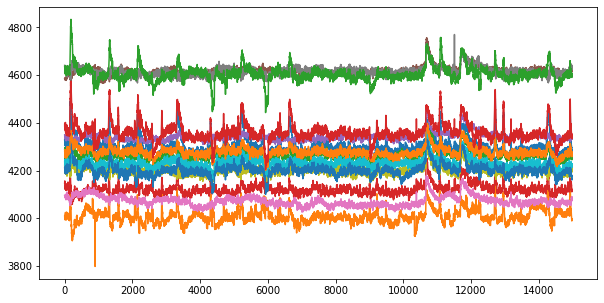

In [6]:
fixed_df = df.copy()
curr_std = None
curr_avg = None
for column in df.columns[:14]:
    curr_avg = df[column].mean()
    fixed_df[column] = df[column].apply(fix_outliers)
    
plt.figure(figsize=(10, 5))
for column in fixed_df.columns[:14]: plt.plot(fixed_df[column])
    
plt.show()

> There appears to be consistent spikes in the data, which may be related to eyes opening and closing. We will examine this further.<br>

> The figure below shows when eyes are opened based on where the pink lines are. This may help provide intuition as to why there are dips and spikes in the data.

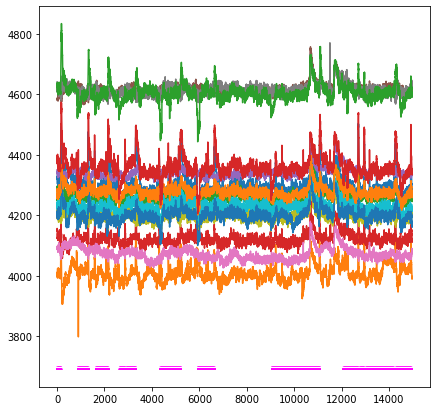

In [28]:
plt.figure(figsize=(7, 7))
for column in fixed_df.columns[:14]: plt.plot(fixed_df[column])
plt.vlines((fixed_df.loc[fixed_df["eyeDetection"]==0].index), 3690, 3700, linestyles ="dotted", colors ="magenta")

plt.savefig("EEG_Signals_Cleaned.png")
plt.show()   

# Predicting Eye State After Preprocessing

In [25]:
# Linear discriminant analysis

X = fixed_df.iloc[:, :-1] # All fields for predicting
y = fixed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for solver in ['svd', 'lsqr', 'eigen']:

    clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage="auto")
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    acc = sum(y_test == preds)/X_test.shape[0]
    
    print(f"Solver: {solver}; Accuracy: {acc}")

Solver: svd; Accuracy: 0.6351132686084142
Solver: lsqr; Accuracy: 0.6351132686084142
Solver: eigen; Accuracy: 0.6351132686084142


In [26]:
X_train

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
5508,4328.21,4050.26,4280.51,4154.36,4349.23,4612.31,4067.69,4598.97,4193.85,4248.72,4217.95,4281.54,4629.23,4377.95
10296,4295.90,4003.59,4264.10,4107.69,4337.44,4630.26,4060.51,4612.31,4199.49,4224.10,4195.38,4264.10,4584.10,4341.03
2199,4290.77,3946.67,4235.38,4102.05,4313.85,4597.95,4068.21,4614.36,4203.08,4245.13,4189.23,4280.00,4672.31,4395.38
2960,4281.54,3973.33,4253.33,4101.54,4321.03,4614.87,4071.28,4617.44,4200.51,4237.95,4193.85,4279.49,4585.64,4349.74
4640,4281.03,3989.74,4264.62,4110.77,4333.33,4615.90,4070.77,4625.13,4203.59,4240.00,4204.10,4284.62,4589.74,4352.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,4320.00,4010.77,4258.46,4121.54,4336.41,4620.51,4065.13,4597.95,4197.95,4251.79,4203.59,4280.51,4613.33,4381.03
13418,4284.62,4021.03,4264.62,4151.79,4350.26,4618.97,4060.00,4607.69,4190.77,4209.74,4193.33,4259.49,4591.28,4343.08
5390,4330.77,3990.26,4287.18,4121.03,4340.00,4614.87,4089.74,4610.77,4204.62,4252.31,4219.49,4304.62,4626.15,4393.33
860,4267.69,4025.13,4254.87,4136.41,4343.59,4620.51,4110.26,4606.67,4207.69,4213.33,4175.90,4270.26,4549.74,4312.82


In [ ]:
pred_results = []
best_model = None
best_acc = None
best_alpha = None
for alpha in [.00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000]:

    clf = RidgeClassifier(alpha=alpha)

    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    acc = sum(y_test == preds)/y_test.shape[0]
    
    if best_model == None or acc > best_acc:
        best_model = clf
        best_acc = acc
        best_alpha = alpha
        
    new_entry = (alpha, acc)
    pred_results.append(new_entry)
    

Best Alpha: 1000
Best Accuracy: 0.6345064724919094


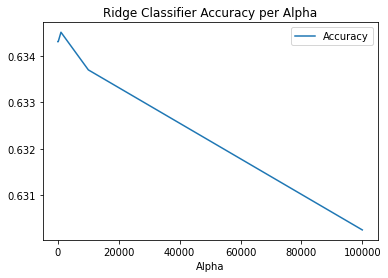

In [10]:
ridge_fig = pd.DataFrame(pred_results, columns=["Alpha", "Accuracy"]).plot(
    kind="line",
    x="Alpha", 
    y="Accuracy",
    title="Ridge Classifier Accuracy per Alpha").get_figure()
ridge_fig.savefig("Ridge_res.png")
print(f"Best Alpha: {best_alpha}\nBest Accuracy: {best_acc}")

In [11]:
pd.DataFrame(pred_results, columns=["Alpha", "Accuracy"]).sort_values(by="Accuracy", ascending=False).reset_index(drop=True).iloc[:3]

,Alpha,Accuracy
0,1000.00000,0.634506
1,0.00001,0.634304
2,0.00010,0.634304


In [12]:
# Random Forest Regression
best_rf_model = None
best_acc = None
best_n_estimators = None
rf_results = []
for estimators in range(50, 2000, 100):
    start = time.time()
    clf = RandomForestClassifier(n_estimators=estimators)

    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = sum(y_test == preds)/X_test.shape[0]
    
    if best_acc == None or acc > best_acc:
        best_acc = acc
        best_rf_model = clf
        best_n_estimators = estimators
        
    end = time.time()
        
    new_entry = (estimators, acc, end-start)
    
    rf_results.append(new_entry)
    
print(f"Best n estimators (Trees Used): {best_n_estimators}\nBest Accuracy: {best_acc}\nTotal Time: {end-start}")
    
rf_res_df = pd.DataFrame(rf_results, columns=["n_estimators", "Accuracy", "Total Time (Seconds)"])

Best n estimators (Trees Used): 750
Best Accuracy: 0.9273867313915858
Total Time: 26.361018657684326


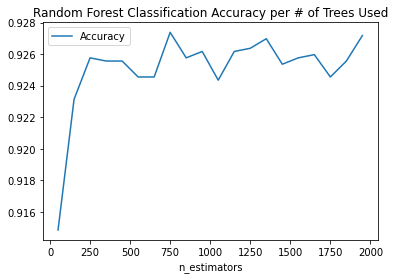

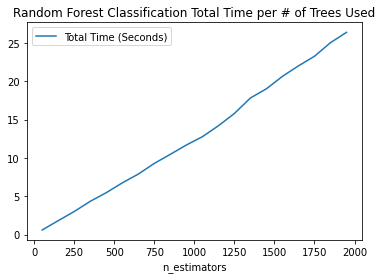

In [13]:
rf_res_df_acc_plot = rf_res_df.plot(x="n_estimators", y="Accuracy", title="Random Forest Classification Accuracy per # of Trees Used").get_figure()
rf_res_df_time_plot = rf_res_df.plot(x="n_estimators", y="Total Time (Seconds)", title="Random Forest Classification Total Time per # of Trees Used").get_figure()
rf_res_df_acc_plot.savefig("rf_res_acc.png")
rf_res_df_time_plot.savefig("rf_res_time.png")
plt.show()

> Interestingly, the Random Forest Classifier seems to take be most accurate once n trees are used in the forest. In addition, the time it takes for the classifier to compute seems to increase linearly as the number of trees being used grows.

In [14]:
# K neighbors
k_neighbor_results = []

for n_neighbors in range(1, 30):
    start = time.time()
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
    neigh.fit(X_train, y_train)
    preds = neigh.predict(X_test)
    acc = sum(preds == y_test)/y_test.shape[0]
    new_entry = (n_neighbors, acc, time.time() - start)
    k_neighbor_results.append(new_entry)
    
k_neighbor_df = pd.DataFrame(k_neighbor_results, columns=["n_neighbors", "Accuracy", "Total Time"])

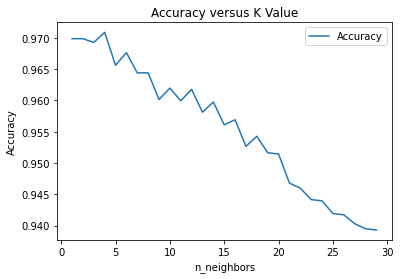

In [15]:
k_neighbor_plot = k_neighbor_df.plot(kind='line', 
                                       x="n_neighbors",
                                       y="Accuracy",
                                    title="Accuracy versus K Value",
                                    ylabel="Accuracy").get_figure()

k_neighbor_plot.savefig("k_neighbor_plot.png")
plt.show()

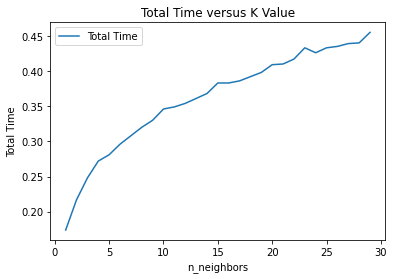

In [16]:
k_neighbor_time_plot = k_neighbor_df.plot(kind='line', 
                                       x="n_neighbors",
                                       y="Total Time",
                                    title="Total Time versus K Value",
                                    ylabel="Total Time").get_figure()

k_neighbor_time_plot.savefig("k_neighbor_time_plot.png")
plt.show()

In [17]:
k_neighbor_df.sort_values(by="Accuracy", ascending=False).iloc[:5].reset_index(drop=True)

,n_neighbors,Accuracy,Total Time
0,4,0.970874,0.272001
1,1,0.969862,0.174000
2,2,0.969862,0.216999
3,3,0.969256,0.248001
4,6,0.967638,0.296000


> Knn performs the best out of all the other algorithms. It seems that the LDA and Ridge Regression classifiers performed poorly because they require the data to be linearly seperable, while the Random Forest and K nearest neighbor classifiers do not.